In [1]:
import torch
import torch.distributions as dist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [37]:
X = dist.Bernoulli(probs=0.5)

# Sample N samples (X1, X2, ..., XN) from the Bernoulli distribution
# and store them in a tensor
N = 500

# Num of samples from population
K = 1000
samples = X.sample((K, N))



In [39]:
samples[0, :]

tensor([1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1.,
        1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
        1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
        0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
        0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
        1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
        1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
        1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
        1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
        0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
        1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
        1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
        0., 0., 0., 0., 1., 0., 1., 1., 

(0.0, 1.0)

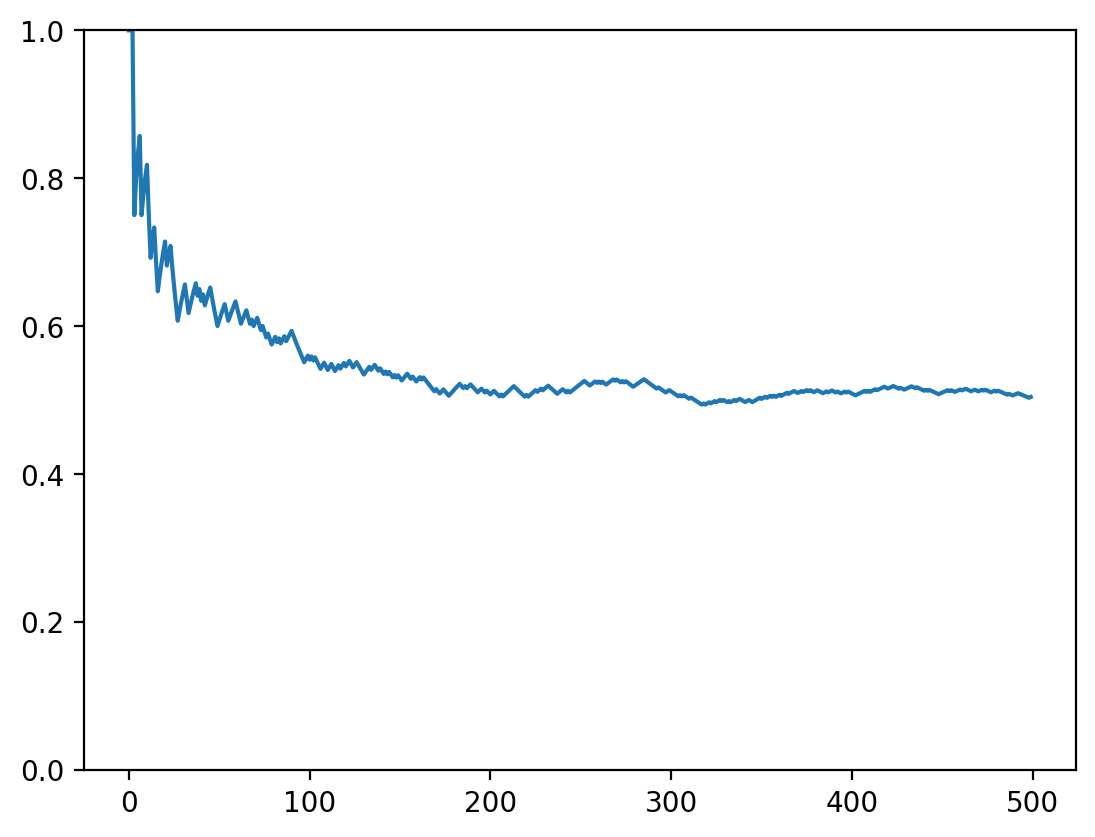

In [38]:

plt.plot(torch.cumsum(samples[0, :], dim=0)/torch.arange(1, N+1).float())
plt.ylim(0, 1)

(0.0, 1.0)

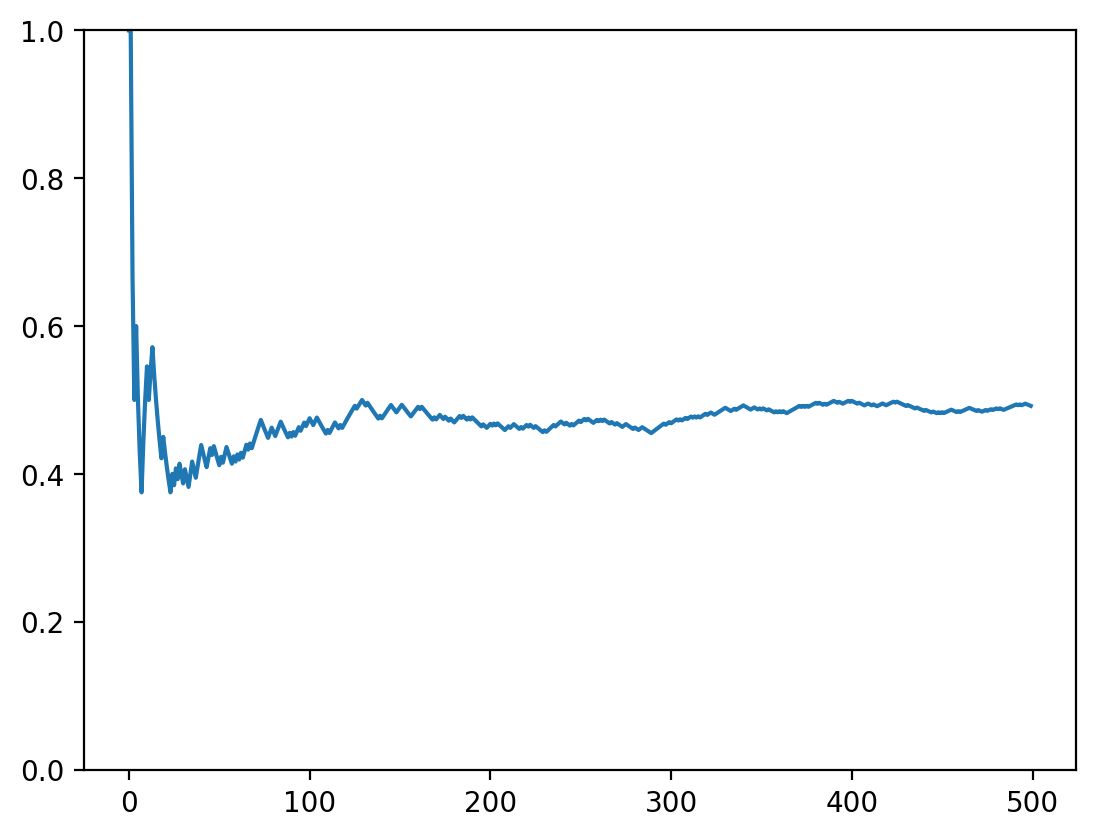

In [40]:
plt.plot(torch.cumsum(samples[1, :], dim=0)/torch.arange(1, N+1).float())
plt.ylim(0, 1)

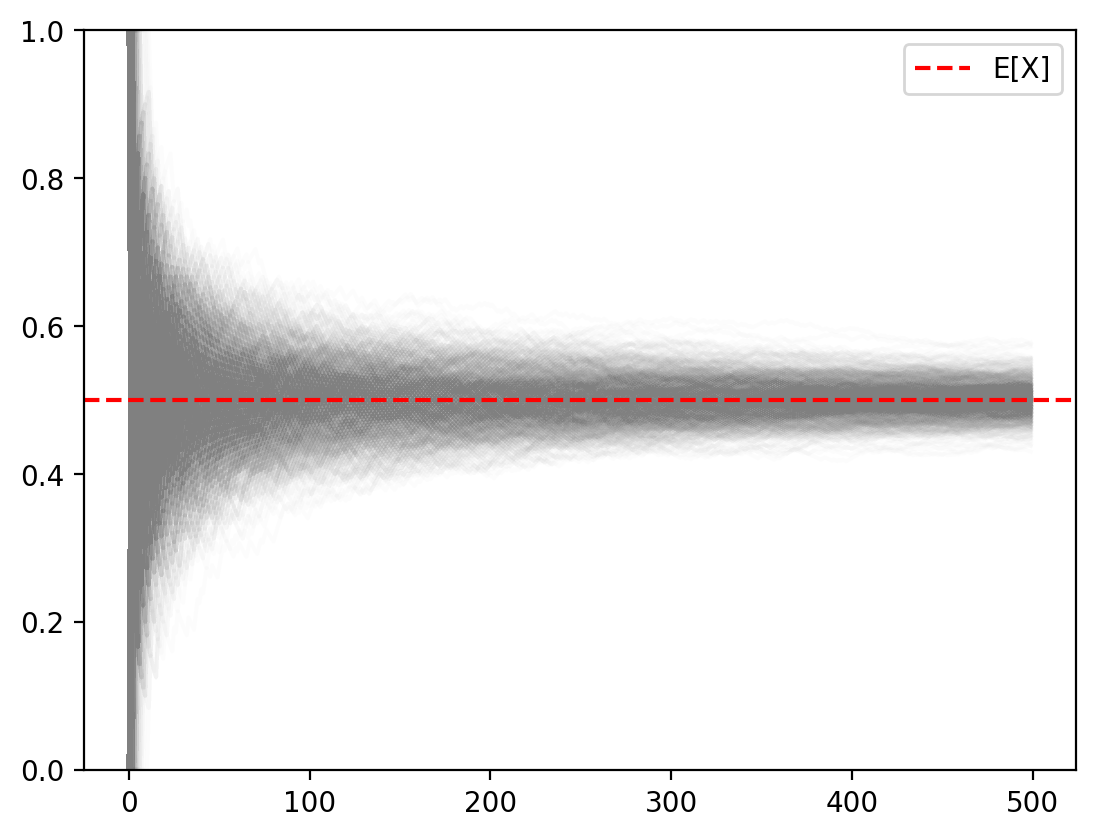

In [45]:
# Plot K draws
running_means = torch.cumsum(samples, dim=1) / torch.arange(1, N+1).float()
for i in range(K):
    plt.plot(running_means[i], alpha=0.02, color='gray')

plt.ylim(0, 1)
plt.axhline(0.5, color='red', linestyle='--', label=r'E[X]')
plt.legend()

/var/folders/1x/wmgn24mn1bbd2vgbqlk98tbc0000gn/T/ipykernel_28285/2045725416.py:37: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(final_means, ax=ax_clt, color='black', linewidth=2, vertical=True)


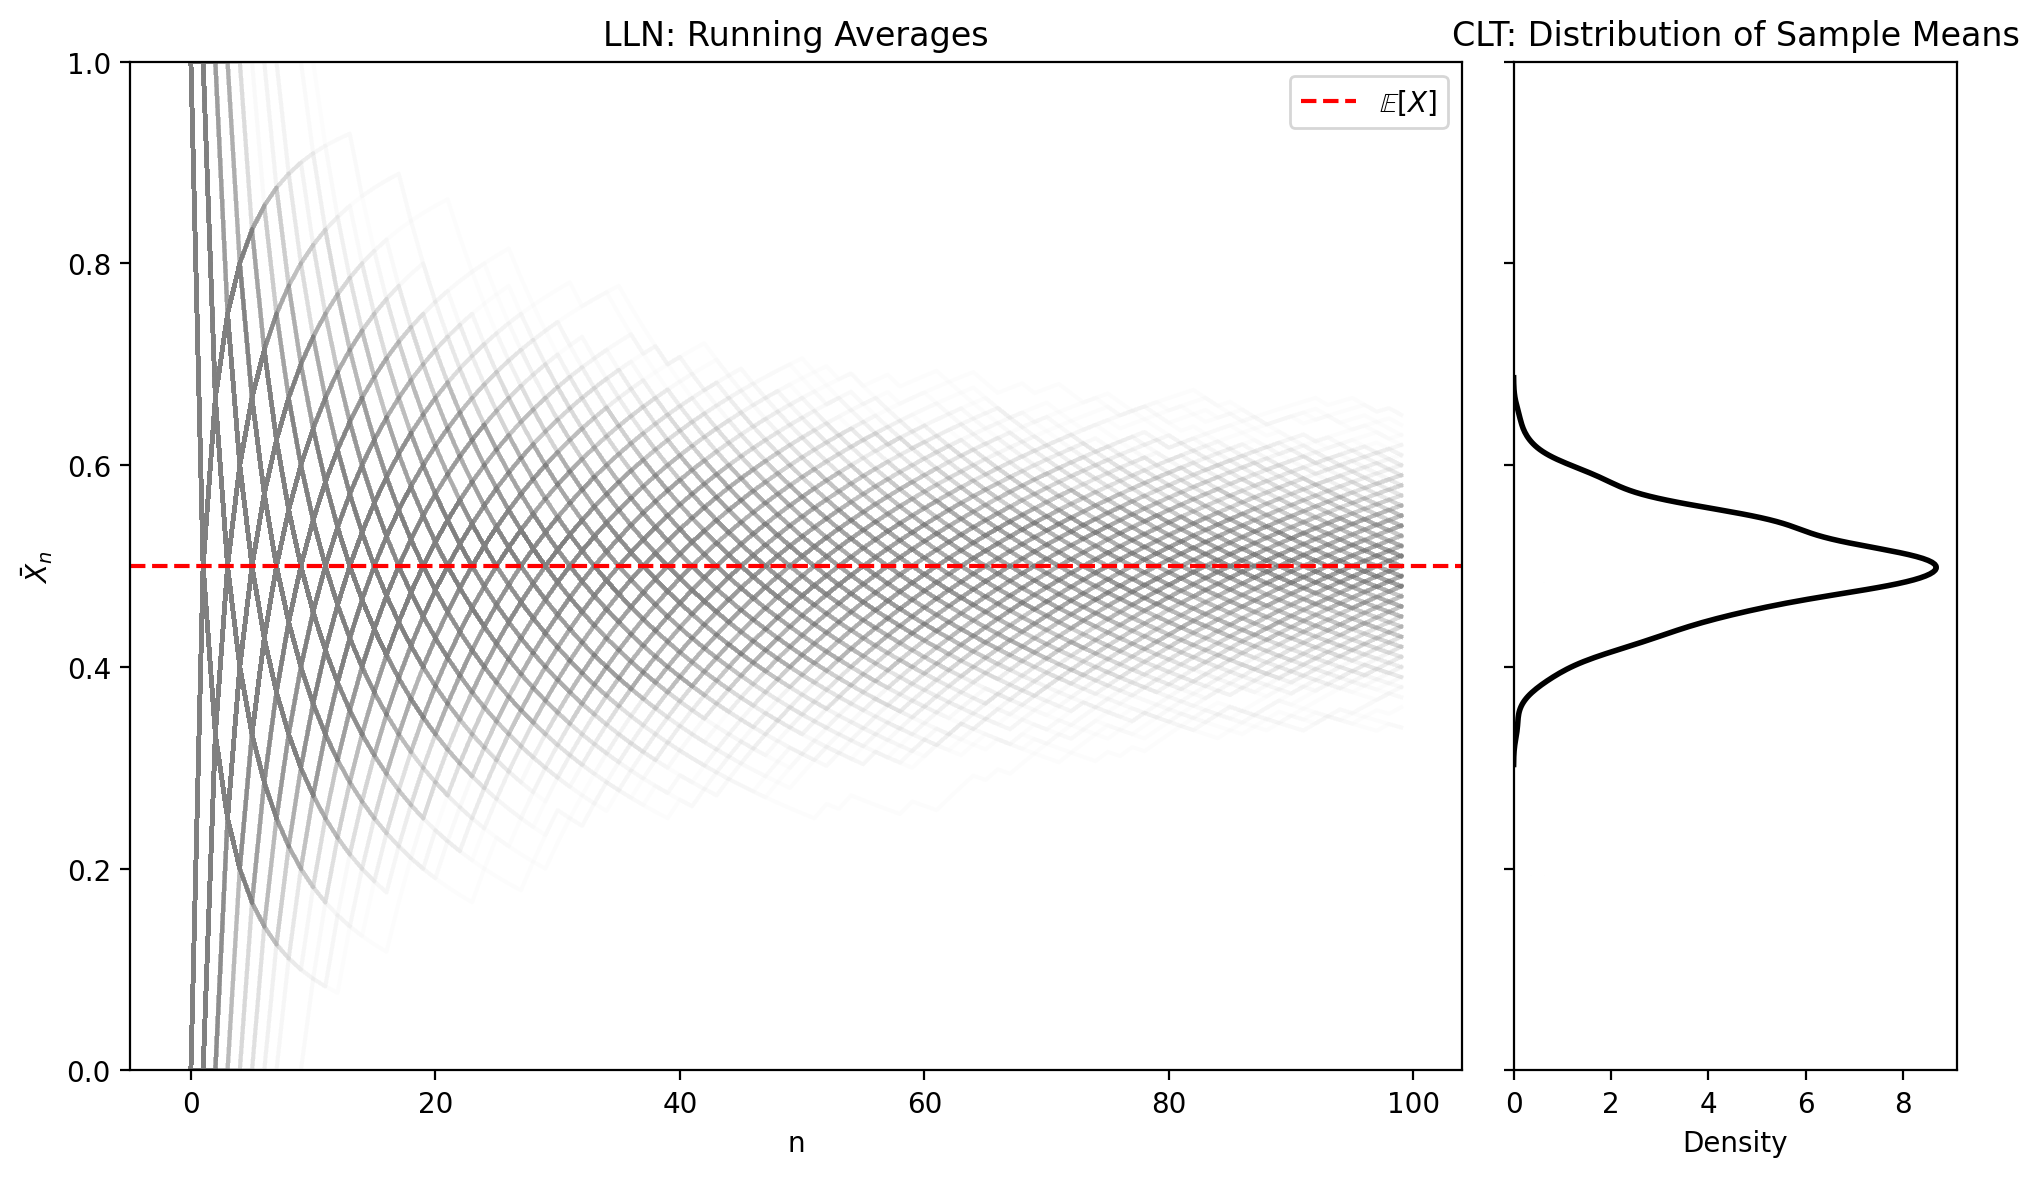

In [ ]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters
K = 1000  # number of repetitions (sample paths)
N = 100   # samples per repetition
p = 0.5   # Bernoulli parameter

# Generate samples
X = torch.distributions.Bernoulli(probs=p)
samples = X.sample((K, N))

# Running averages (LLN)
running_means = torch.cumsum(samples, dim=1) / torch.arange(1, N + 1).float()

# Final sample means (for CLT)
final_means = running_means[:, -1].numpy()

# --- Plotting ---
fig, (ax_lln, ax_clt) = plt.subplots(1, 2, figsize=(10, 6), gridspec_kw={'width_ratios': [3, 1]}, sharey=True)

# LLN plot (running means)
for i in range(K):
    ax_lln.plot(running_means[i], color='gray', alpha=0.02)

ax_lln.axhline(p, color='red', linestyle='--', label=r'$\mathbb{E}[X]$')
ax_lln.set_xlabel("n")
ax_lln.set_ylabel(r"$\bar{X}_n$")
ax_lln.set_title("LLN: Running Averages")
ax_lln.set_ylim(0, 1)
ax_lln.legend()

# CLT plot (rotated histogram + KDE)
#sns.histplot(final_means, bins=30, stat='density', orientation='horizontal',
#             ax=ax_clt, color='skyblue', edgecolor='white', alpha=0.6)
sns.kdeplot(final_means, ax=ax_clt, color='black', linewidth=2, vertical=True, bw_adjust=4)

ax_clt.set_xlabel("Density")
ax_clt.set_ylabel("")  # shared y-axis
ax_clt.set_title("CLT: Distribution of Sample Means")
ax_clt.set_ylim(0, 1)
ax_clt.grid(False)

plt.tight_layout()
